In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from pandas_profiling import ProfileReport

In [5]:
pf = ProfileReport(df)
pf.to_file(output_file='out.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\HP\anaconda3\lib\site-packages\multimethod\__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [8]:
from sklearn.pipeline import Pipeline,make_pipeline

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), 
                                                    df['Survived'],
                                                    test_size=0.2, 
                                                    random_state=42)

In [19]:
trf1 = ColumnTransformer(transformers=[
    ('input_age',SimpleImputer(),['Age']),
    ('input_emabark',SimpleImputer(strategy='most_frequent'),['Embarked'])
],remainder='passthrough')

In [20]:
trf2 = ColumnTransformer(transformers=[
    ('ohe_sex_embark',OneHotEncoder(sparse=False,handle_unknown='ignore'),['Sex','Embarked'])
],remainder='passthrough')

In [21]:
trf3 = ColumnTransformer([
    ('Scale',MinMaxScaler(),slice(0,10))
])

In [22]:
from sklearn.feature_selection import SelectKBest,chi2

In [23]:
trf4 = SelectKBest(score_func=chi2,k=8)

In [29]:
trf1.fit_transform(X_train)

array([[23.0, 'S', 2, ..., 0, 0, 13.0],
       [24.0, 'S', 3, ..., 0, 2, 16.7],
       [32.5, 'C', 2, ..., 1, 0, 30.0708],
       ...,
       [24.0, 'S', 2, ..., 0, 0, 13.0],
       [31.0, 'S', 2, ..., 0, 0, 10.5],
       [21.0, 'S', 3, ..., 0, 0, 7.65]], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age QQ Plot')

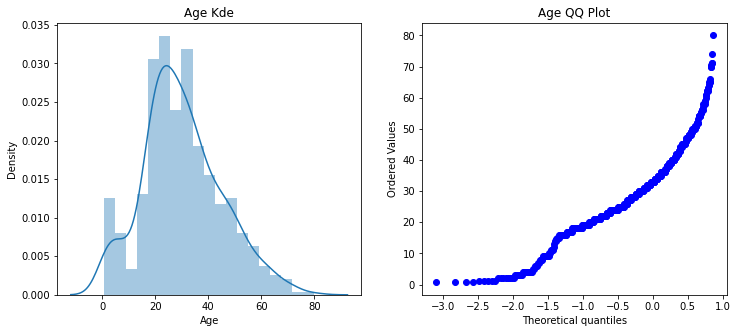

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Kde')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot = plt)
plt.title('Age QQ Plot')